In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

Założenia wyliczenia

In [16]:
today_cost = 120000
cost_rate = 0.05
interest_rate = 0.12
years = 5
frequency = 12

Wyliczenie przypuszczalnej wartości po okresie 5 lat

In [17]:
months_to_buy = years * frequency

monthly_cost_rate = cost_rate / 12

future_value = np.around(npf.fv(monthly_cost_rate, months_to_buy, 0, -today_cost), 2)

print(f'Za 5 lat mieszkanie będzie kosztowało {future_value:.2f} zł.')

Za 5 lat mieszkanie będzie kosztowało 154003.04 zł.


Wyliczenie przypuszczalnego rocznego wzrostu ceny

In [24]:
periods = np.arange(1,months_to_buy+1,dtype=int)

yearly_grow = np.around(npf.ppmt(cost_rate, periods, years, today_cost, -future_value), 2)

monthly_grow = np.around(npf.ppmt(monthly_cost_rate, periods, months_to_buy, today_cost, -future_value), 2)

Ile będzie trzeba odkładać co miesiąc, aby za 5 lat kupić mieszkanie za gotówkę?

In [28]:
monthly_rate = interest_rate / 12

monthly_payments = np.around(npf.ppmt(monthly_rate, periods, months_to_buy, -future_value), 2)

real_monthly_payments = np.around((monthly_payments[0] * 100) / 101, 2)

print(f'Co mieiąc trzeba odkładać {real_monthly_payments:.2f} zł')

Co mieiąc trzeba odkładać 1867.01 zł


Text(0, 0.5, 'Kwota')

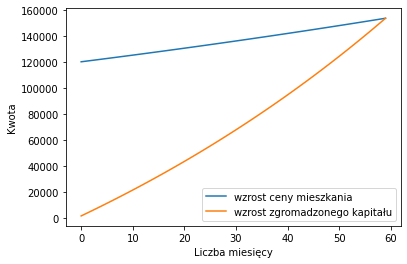

In [27]:
plt.plot(monthly_grow.cumsum()+today_cost,label='wzrost ceny mieszkania')
plt.plot(monthly_payments.cumsum(),label='wzrost zgromadzonego kapitału')
plt.legend()
plt.xlabel('Liczba miesięcy')
plt.ylabel('Kwota')